# Sistem Persamaan Differensial

## Contoh 1: Hukum Kirchhoff
Hukum Kirchhoff menyatakan jumlah setiap perubahan tegangan sesaat di sekitar rangkaian tertutup adalah nol. Hukum ini mengimplikasikan bahwa arus $I(t)$ dalam rangkaian tertutup yang mengandung resistor $R$ ohm, kapasitor $C$ farads, induktor $L$ henries, dan sumber tegangan $E(t)$ memenuhi persamaan

$$
    E(t) = LI'(t) + RI(t) + \frac{1}{C} \int I(t) dt
$$

Seperti yang terlihat pada gambar di bawah, arus $I_1(t)$ dan $I_2(t)$ di kiri dan kanan loop, berturut-turut, dari rangkaian menunjukan bahwa solusinya adalah

$$
    2I_1(t) + 6(I_1(t) - I_2(t)) + 2I_1'(t) = 12, \\
    \frac{1}{0.5} \int I_2(t) dt + 4I_2(t) + 6(I_2(t) - I_1(t)) = 0. 
$$

![](images/kirchoff.png)

Jika switch di rangkaian tertutup pada waktu $t=0$, kita dapatkan kondisi awal $I_1(0) = 0$ dan $I_2(0) = 0$. Selesaikan $I'(t)$ pada persamaan pertama, turunkan persamaan kedua, dan subtitusi $I_1'(t)$ kita dapatkan

$$
\begin{align}
I_1' &= f_1(t, I_1, I_2) &=& -4I_1 + 3I_2 + 6, I_1(0) = 0,  \\
I_2' &= f_2(t, I_1, I_2) &=& 0.6I_1' - 0.2 I_2 = -2.4I_1 + 1.6I_2 + 3.6, I_2(0) = 0.
\end{align}
$$

Solusi eksaknya adalah

$$
\begin{align}
    I_1(t) &= -3.375 e^{-2t} + 1.875 e^{-0.4t} + 1.5, \\
    I_2(t) &= -2.25 e^{-2t} + 2.25 e^{-0.4t}.
\end{align}
$$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T = 20
h = 0.1
N = int(T/h)

In [3]:
t = np.zeros(N+2)
eksak1 = np.zeros(N+1)
eksak2 = np.zeros(N+1)
for i in range(N+1):
    eksak1[i] = -3.375*math.exp(-2*t[i]) + 1.875*math.exp(-0.4*t[i]) + 1.5
    eksak2[i] = -2.25*math.exp(-2*t[i]) + 2.25*math.exp(-0.4*t[i])
    t[i+1] = t[0] + (i+1)*h

In [4]:
def f1(t,I1,I2):
    return -4*I1 + 3*I2 + 6

def f2(t,I1,I2):
    return -2.4*I1 + 1.6*I2 + 3.6

In [5]:
#RK4
t = np.zeros(N+1)
F = [f1, f2]
K = np.zeros((4, len(F)))
I = np.zeros((N+1,2))

for i in range(N):
    for j in range(len(F)):
        K[0,j] = h*F[j](t[i], I[i,0], I[i,0])
    for j in range(len(F)):
        K[1,j] = h*F[j](t[i] + 0.5*h, I[i,0] + 0.5*K[0,0], I[i,1] + 0.5*K[0,1])
    for j in range(len(F)):
        K[2,j] = h*F[j](t[i] + 0.5*h, I[i,0] + 0.5*K[1,0], I[i,1] + 0.5*K[1,1])
    for j in range(len(F)):
        K[3,j] = h*F[j](t[i] + h, I[i,0] + K[2,0], I[i,1] + K[2,1])
    
    for j in range(len(F)):
        I[i+1,j] = I[i,j] + (1/6)*(K[0,j] + 2*K[1,j] + 2*K[2,j] + K[3,j])
    
    t[i+1] = t[0] + (i+1)*h

In [6]:
#fig, axs = plt.subplots(2, 1)

#axs[0].plot(t, eksak1, label="Solusi Eksak")
#axs[0].plot(t, I[:,0], '-o', label="Solusi RK4")
#axs[0].set_title('$I_1$')

#axs[1].plot(t, eksak2, label="Solusi Eksak")
#axs[1].plot(t,I[:,1], '-o', label="Solusi RK4")
#axs[1].set_title('$I_2$')

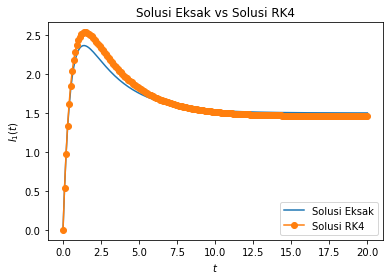

In [7]:
plt.title('Solusi Eksak vs Solusi RK4')
plt.xlabel('$t$')
plt.ylabel('$I_1(t)$')

plt.plot(t, eksak1, label="Solusi Eksak")
plt.plot(t, I[:,0], '-o', label="Solusi RK4")
plt.legend(loc=4)

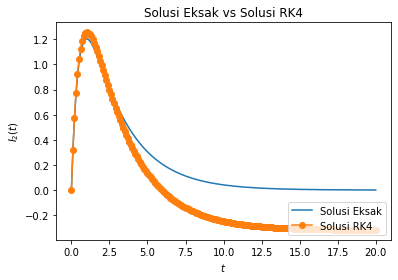

In [8]:
plt.title('Solusi Eksak vs Solusi RK4')
plt.xlabel('$t$')
plt.ylabel('$I_2(t)$')

plt.plot(t, eksak2, label="Solusi Eksak")
plt.plot(t, I[:,1], '-o', label="Solusi RK4")
plt.legend(loc=4)

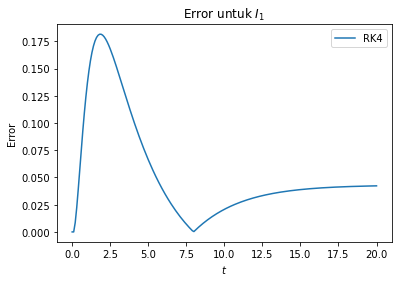

In [9]:
error_rk4 = np.abs(eksak1-I[:,0])

plt.title('Error untuk $I_1$')
plt.xlabel('$t$')
plt.ylabel('Error')

plt.plot(t,error_rk4, label="RK4")

plt.legend()

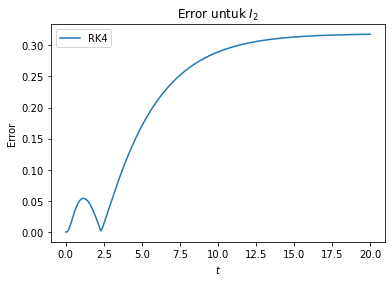

In [10]:
error_rk4 = np.abs(eksak2-I[:,1])

plt.title('Error untuk $I_2$')
plt.xlabel('$t$')
plt.ylabel('Error')

plt.plot(t,error_rk4, label="RK4")

plt.legend()